## **Bank Customer Churn Prediction**

### **1. Introduction**

#### **1.1 Objectives**
1. Conduct data exploration and data cleaning
2. Conduct descriptive analysis of the data.
3. Determine relationship between variables.
4. Conduct churn prediction, given the variables in the dataset.
5. Share insights and findings through visualizations and observations.

#### **1.2 Methodology**
1. Use Python and necessary packages in conducting exploratory data analysis and data visualizations.
2. Check the dataset for incorrect datatypes and data.
3. Check the dataset for null values.
4. If there are incorrect datatypes and data and presence of null values, employ necessary actions to correct the data.
5. Create additional columns (if necessary) by using data extracted from an existing column.
6. Create data visualizations for descriptive analysis.
7. Plot relationship between variables using visualization tools such as Seaborn and Matplotlib.
8. Write observations based on the results of the analysis.
9. Create a machine learning model to predict the likelihood that a customer will churn, based on the variables in the dataset.
10. Evaluate the results of the machine learning model and share insights and recommendations.

#### **1.3 Description of Variables**

Column | Description
----- | -----
customer_id |unique identifier for each customer
vintage |the duration of the customer's relationship with the company
age |age of the customer
gender |gender of the customer
dependents |number of dependents the customer has
occupation |the occupation of the customer
city |city in which the customer is located
customer_nw_category |net worth category of the customer
branch_code |code identifying the branch associated with the customer
current_balance |current balance in the customer's account
previous_month_end_balance |account balance at the end of the previous month
average_monthly_balance_prevQ |average monthly balance in the previous quarter
average_monthly_balance_prevQ2 |average monthly balance in the second previous quarter
current_month_credit |credit amount in the current month
previous_month_credit |credit amount in the previous month
current_month_debit |debit amount in the current month
previous_month_debit |debit amount in the previous month
current_month_balance |account balance in the current month
previous_month_balance |account balance in the previous month
churn |variable indicating whether the customer has churned(1 - churned, 0 - not churned)
last_transaction |timestamp of the customer's last transaction


### **2. Data Preparation**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("D:\Documents\CSV Datasets\Bank Churn\churn_prediction.csv")

In [3]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


### **3. Data Cleaning**

In [4]:
print(df.shape)

(28382, 21)


In [5]:
## Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [6]:
## Check the percentage of null values for each column in the dataset

for col in df.columns:
    percentage_null = np.round((df[col].isnull().sum()*100) / len(df[col]),2)
    print('Null Values for column {} is {}%'.format(col, percentage_null))

Null Values for column customer_id is 0.0%
Null Values for column vintage is 0.0%
Null Values for column age is 0.0%
Null Values for column gender is 1.85%
Null Values for column dependents is 8.68%
Null Values for column occupation is 0.28%
Null Values for column city is 2.83%
Null Values for column customer_nw_category is 0.0%
Null Values for column branch_code is 0.0%
Null Values for column current_balance is 0.0%
Null Values for column previous_month_end_balance is 0.0%
Null Values for column average_monthly_balance_prevQ is 0.0%
Null Values for column average_monthly_balance_prevQ2 is 0.0%
Null Values for column current_month_credit is 0.0%
Null Values for column previous_month_credit is 0.0%
Null Values for column current_month_debit is 0.0%
Null Values for column previous_month_debit is 0.0%
Null Values for column current_month_balance is 0.0%
Null Values for column previous_month_balance is 0.0%
Null Values for column churn is 0.0%
Null Values for column last_transaction is 0.0

### Findings
1. The dataset contains incorrect datatypes, such as:
   - dependents (datatype is `float64` - will be changed into `int64`)
   - city (datatype is `float64` - will be changed into `int64`)
2. The dataset contains null values in the following columns:
   - gender (1.85% of the total)
   - dependents (8.68% of the total)
   - occupation (0.28% of the total)
   - city (2.83% of the total)
3. The column `last_transaction` has object datatype but contains both datetime in YYYY-MM-DD format and string value of NaT which means no transaction.

### Actions
#### Incorrect datatypes
1. Change datatype for columns `dependents` and `city` into `int64`.

#### Null values
1. There are values of 0.0 in the `dependents` column, which means that the customer has no dependents, therefore, the null value for this column does not indicate that a customer has no dependents. It is not advisable to imputate values for this column due to the percentage of null values for this variable to be more than 5.0%, which might cause over-representation, and due to the fact that the values for this column is customer-inputted, and cannot be imputated by the column's mean, median, or mode values.
2. The same will be done for the columns `gender`, `occupation`, and `city`, despite the percentage of null values to be less than 5.0%, the values for these columns are also customer-inputted, and cannot be imputated by the column's mean, median, and mode values.

#### Varying datatypes in `last_transaction` column
1. Change the datatype for the `last_transaction` column into `datetime`. The NaT values will be converted into 0000-00.
2. Create a new column `last_transaction_period` containing YYYY-MM values from the `last_transaction` column and will be in `period` datatype.

In [7]:
## Create a new dataframe by dropping all null values in the 'df' dataframe
df1 = df.copy()
df1 = df1.dropna(axis=0)

In [8]:
## Change datatype for 'dependents' and 'city' columns into int64
df1[['dependents','city']] = df1[['dependents','city']].astype('int64')

## Change datatype of 'last_transaction' column into datetime
df1['last_transaction'] = pd.to_datetime(df1['last_transaction'], errors='coerce').replace('Nat','0000-00')
df1['last_transaction_period'] = df1['last_transaction'].dt.to_period('M').replace('NaT', '0000-00')

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24832 entries, 0 to 28381
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   customer_id                     24832 non-null  int64         
 1   vintage                         24832 non-null  int64         
 2   age                             24832 non-null  int64         
 3   gender                          24832 non-null  object        
 4   dependents                      24832 non-null  int64         
 5   occupation                      24832 non-null  object        
 6   city                            24832 non-null  int64         
 7   customer_nw_category            24832 non-null  int64         
 8   branch_code                     24832 non-null  int64         
 9   current_balance                 24832 non-null  float64       
 10  previous_month_end_balance      24832 non-null  float64       
 11  average

In [9]:
df1.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,last_transaction_period
0,1,2101,66,Male,0,self_employed,187,2,755,1458.71,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21,2019-05
2,4,2194,31,Male,0,salaried,146,2,41,3913.16,...,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT,NaT
4,6,1579,42,Male,2,self_employed,1494,3,388,927.72,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03,2019-11
5,7,1923,42,Female,0,self_employed,1096,2,1666,15202.20,...,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01,2019-11
6,8,2048,72,Male,0,retired,1020,1,1,7006.93,...,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24,2019-09


There are **3,550** rows that were dropped that contains null values. The datatype for all the column have now been corrected.

#### **3.1 Descriptive Statistics of the Data**

In [10]:
df1.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
count,24832.000000,24832.000000,24832.000000,24832.000000,24832.000000,24832.000000,24832.000000,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,2.483200e+04,24832.000000,22067
mean,15120.719555,2090.259907,47.818903,0.352368,798.836783,2.215689,864.746013,7.005608e+03,7.102969e+03,7.068944e+03,6.641527e+03,3.504050e+03,3.360356e+03,3.661734e+03,3.343667e+03,7.040927e+03,7.075169e+03,0.181943,2019-10-25 01:33:54.186794752
min,1.000000,73.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.145380e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000,2018-12-31 00:00:00
25%,7525.500000,1957.000000,36.000000,0.000000,409.000000,2.000000,159.000000,1.799033e+03,1.916702e+03,2.193320e+03,1.847767e+03,3.300000e-01,3.300000e-01,4.300000e-01,4.300000e-01,2.018133e+03,2.083472e+03,0.000000,2019-10-02 00:00:00
50%,15117.500000,2153.000000,46.000000,0.000000,837.000000,2.000000,531.000000,3.294560e+03,3.387745e+03,3.539225e+03,3.371800e+03,6.300000e-01,6.600000e-01,1.290450e+02,1.430700e+02,3.451155e+03,3.459390e+03,0.000000,2019-12-03 00:00:00
75%,22680.250000,2292.000000,60.000000,0.000000,1096.000000,3.000000,1364.000000,6.629138e+03,6.655170e+03,6.662980e+03,6.517560e+03,7.149600e+02,8.146525e+02,1.428592e+03,1.428630e+03,6.664008e+03,6.648450e+03,0.000000,2019-12-20 00:00:00
max,30301.000000,2476.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,1.398486e+06,1.398486e+06,1.398486e+06,1.389627e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,1.398486e+06,1.398486e+06,1.000000,2019-12-31 00:00:00
std,8736.591147,273.916048,16.864493,1.007858,430.826252,0.663905,890.994940,2.130752e+04,2.200392e+04,2.047696e+04,1.866737e+04,8.166208e+04,3.069930e+04,5.401130e+04,2.376745e+04,2.073199e+04,2.194976e+04,0.385805,NaN


1. The customer with the longest relationship with the company has a `vintage` value of **2476 days**, while the customer with the shortest relationship with the company has a `vintage` value of **73 days**.
2. The oldest customer in the bank is **90 years old**, while the youngest is **1 year old**.
3. The customer with the most number of dependents has **52**.
4. The net worth category in the dataset ranges from **1 to 3**. However, the description does not indicate the details for these categories. These categories will be investigated later.
5. The highest current balance, previous month end balance, and average monthly balance for the previous two quarters are the same at **1,398,486**.

### **4. Exploratory Data Analysis (EDA)**

#### **4.1 Number of Churned Customers**

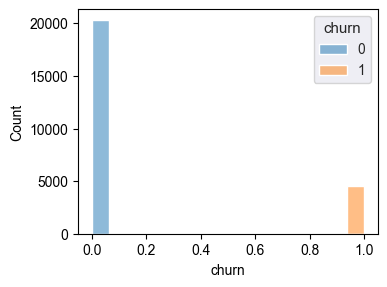

The total number of churned customers is 5260, which is 18.53% of the total number of customers
The total number of churned customers is 4518, which is 15.92% of the total number of customers, excluding null values


In [11]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
sns.set(font_scale=0.9)

## Plot the number of of customers who churned versus who did not
sns.histplot(data=df1, x='churn', hue='churn', palette=sns.color_palette('tab10', 2))

plt.tight_layout()
plt.show()

## Print the number of customers churned and not churned
no_churned = (df['churn'] == 1).sum()
no_churned1 = (df1['churn'] == 1).sum()
total_customers = (len(df['customer_id']))
percent_churned = (round((no_churned / total_customers) * 100, 2))
percent_churned1 = (round((no_churned1 / total_customers) * 100, 2))

print('The total number of churned customers is {}, which is {}% of the total number of customers'.format(no_churned, percent_churned))
print('The total number of churned customers is {}, which is {}% of the total number of customers, excluding null values'.format(no_churned1, percent_churned1))


*Note: The 'total number of customers' indicated in these findings refer to the total before removing null values and outliers.*

1. There is a very small percentage of customers who churned from the bank, consisting of less than 20% of the total customers.
2. The value slightly decreased into **15.92%** after the removal of null values.

#### **4.2 Net Worth Category**

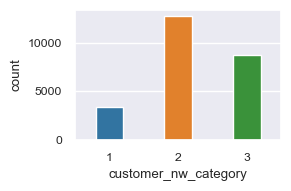

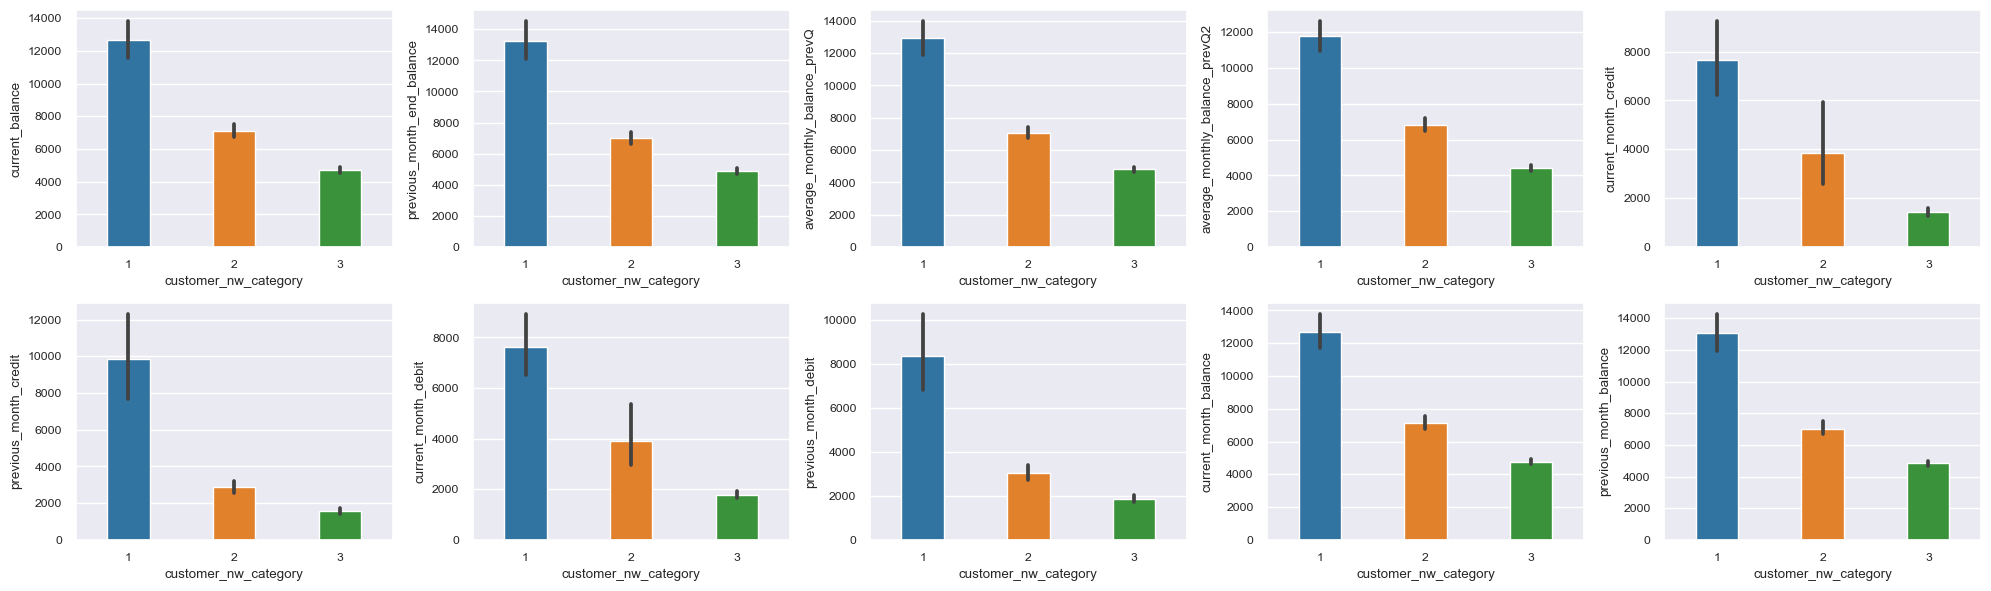

In [16]:
## Plot the number of customers that below to a certain net worth category
fig = plt.subplots(1,1, figsize=(3,2))

sns.countplot(data=df1, x='customer_nw_category', width=0.4, palette=sns.color_palette('tab10', 3))

plt.tight_layout()

## Determine the financial values for each net worth category
balance_columns = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 7]
df1_bal = df1.iloc[:, balance_columns]

fig, axes = plt.subplots(2, 5, figsize=(20,6))

for i, ax in enumerate(axes.flatten()):
    if i < 10:
        sns.barplot(data=df1_bal, x='customer_nw_category', y=df1_bal.columns[i], width=0.4, palette=sns.color_palette('tab10'), ax=ax)
    
plt.tight_layout()
plt.show()

1. Based on the barplots above, the customer with value of 1 for the `customer_nw_category` column have the highest balance, credit, and debit, which means that the Category 1 have the highest net worth, followed by Category 2, then Category 3 for the lowest net worth.
2. The most number of customers came from net worth category 2.

#### **4.3 Relationship between Variables and Churn**

#### 4.3.1 Vintage, Last Transaction, and Churn
For this relationship, we will plot the relationship between time-related variables such as `vintage` - the duration of the relationship between the customer and the bank, and `last_transaction` - the date of the last transaction of the customer, to the customer's decision to churn or not.

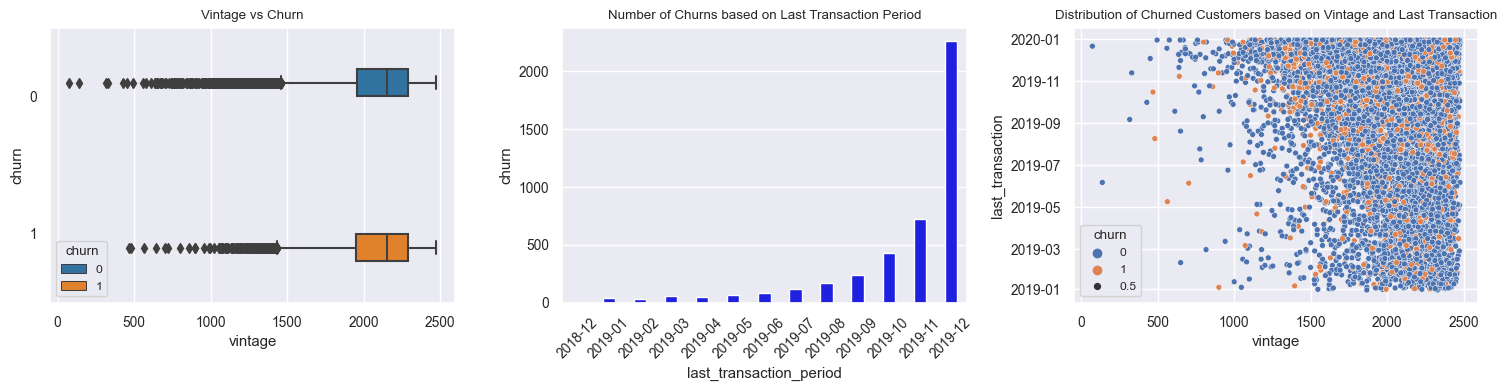

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.set(font_scale=0.8)

## Plot the relationship between 'vintage' and 'churn'
sns.boxplot(data=df1, x='vintage', y='churn', hue='churn', palette=sns.color_palette('tab10', 2), orient='h', width=0.4, ax=axes[0])
axes[0].set_title('Vintage vs Churn')

## Plot the relationship between 'last_transaction' and 'churn'
churn_transaction_count = df1.groupby('last_transaction_period')['churn'].sum().reset_index()
sns.barplot(data=churn_transaction_count, x='last_transaction_period', y='churn', width=0.4, color='blue', ax=axes[1])
axes[1].set_xticks(range(len(churn_transaction_count['last_transaction_period'])))
axes[1].set_xticklabels(churn_transaction_count['last_transaction_period'].astype(str), rotation=45)
axes[1].set_title('Number of Churns based on Last Transaction Period')

## Plot the relationship between 'vintage' and 'last transaction'
sns.scatterplot(data=df1, x='vintage', y='last_transaction', hue='churn', size=0.5, ax=axes[2])
axes[2].set_title('Distribution of Churned Customers based on Vintage and Last Transaction')

plt.tight_layout()
plt.show()

1. For the boxplot showing the relationship between `vintage` and `churn` columns, the median values and interquartile ranges for both churned and not churned customers are almost similar, with few more outliers for the not churned customers. This indicates that there is a very little correlation on whether an employee will churn based on how long is their relationship with the bank. This is also true for the data without the outliers.
2. For the barplot showing the relationship between `last_transaction_period` and `churn` columns, it clearly shows that customers with the latest transaction have churned. This could indicate that these transactions are withdrawals. This is also true for the data without the outliers, with a small decline for the customers with last transcation period of November 2019.
3. The relationship is more visible in the scatterplot between `vintage` and `last_transaction`, in which the churned customers are scattered in different vintages, but showing quite an increase for customers with the latest transactions.

#### 4.2 Age, Gender, Dependents, and Occupation

For this relationship, we will plot the relationship between social variables such as `age`, `gender`, `dependents`, and `occupation` to the customer's decision to churn or not.

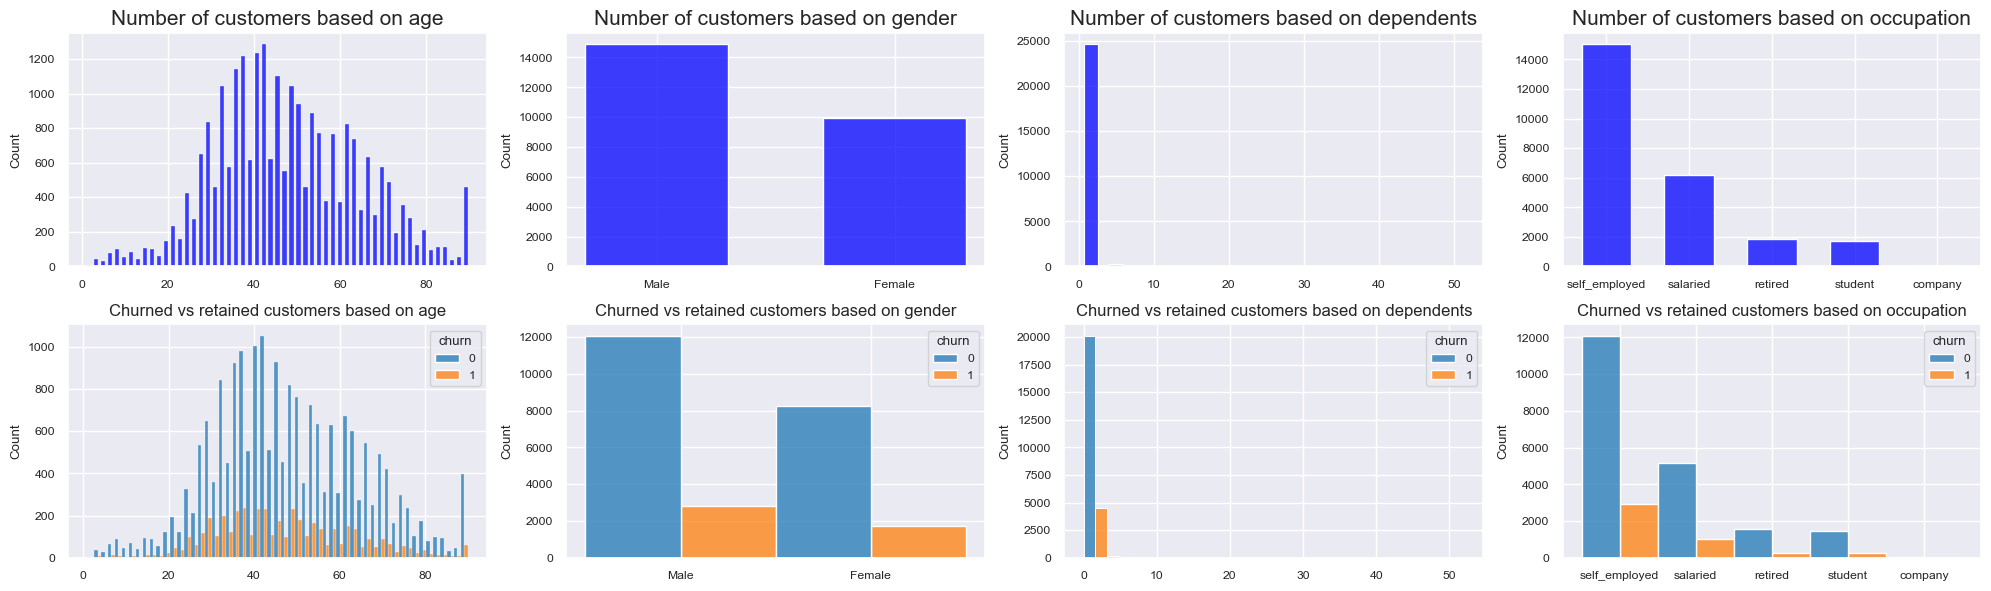

In [14]:
## Determine the number of customers based on 'age', 'gender', 'dependents', and 'occupation'
social_columns = ['age','gender','dependents','occupation']

fig, axes = plt.subplots(2,4, figsize=(20,6))

axes=axes.flatten()

for i, col in enumerate(social_columns):
    ## Determine the number of customers based on 'age', 'gender', 'dependents', and 'occupation'
    sns.histplot(data=df1, x=col, multiple='dodge', legend=False, color='blue', shrink=0.6, ax=axes[i])
    axes[i].set_title('Number of customers based on {}'.format(col), fontsize=15)
    axes[i].set_xlabel(xlabel='')
    ## Plot the relationship between 'age', 'gender', 'dependents', 'occupation', and 'churn'
    sns.histplot(data=df1, x=col, hue='churn', multiple='dodge', palette=sns.color_palette('tab10', 2), shrink=1, ax=axes[i+4])
    axes[i+4].set_title('Churned vs retained customers based on {}'.format(col).replace('_', ' '), fontsize=12)
    axes[i+4].set_xlabel(xlabel='')

plt.tight_layout()
plt.show()

1. The highest number of churns was found in the age range of 30 to 50. However, this is also the age range found to have the highest number of retained (not churned) customers. The highest number of customers was also found to be within this age range.
2. More male customers have churned compared to female customers.
3. Most of the customers who have churned have no dependents.
4. Most of the customers who have churned are self-employed, and a noticeable number also came from salaried customers.
5. A huge number of customers belong to self-employed category.

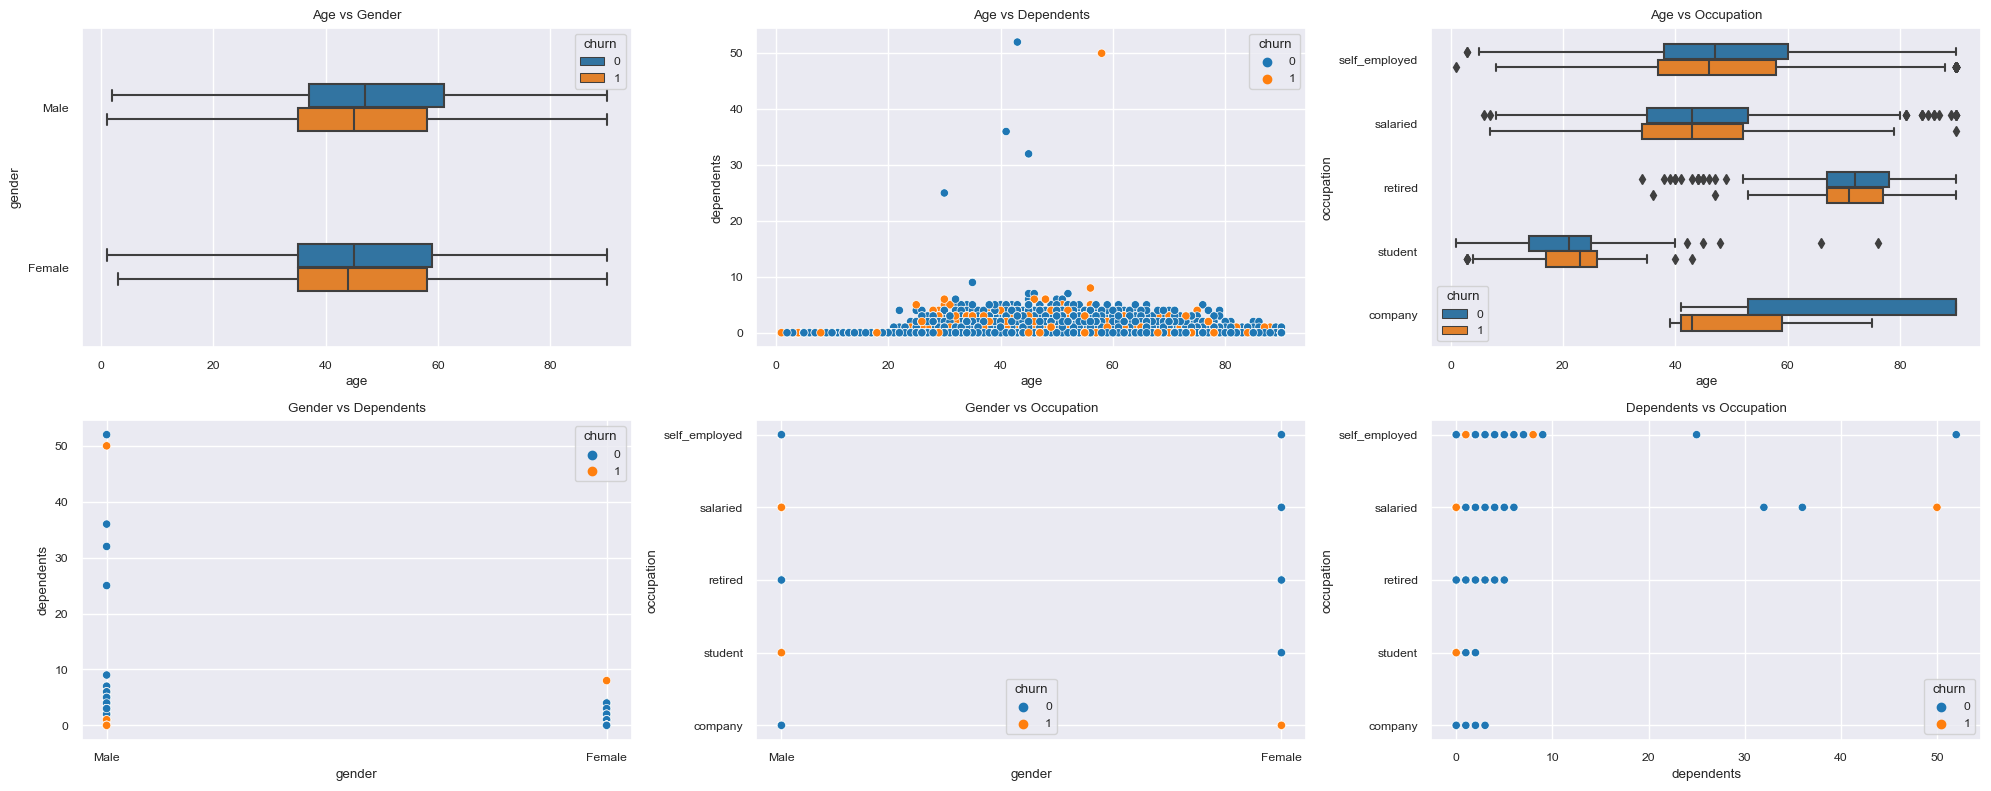

In [15]:
fig, axes = plt.subplots(2,3, figsize=(20,8))

## Plot the distribution of values between 'age' and 'gender', based on 'churn'
sns.boxplot(data=df1, x='age', y='gender', hue='churn', palette=sns.color_palette('tab10', 2), width=0.3, ax=axes[0,0])
axes[0,0].set_title('Age vs Gender')
## Plot the distribution of values between 'age' and 'dependents', based on 'churn'
sns.scatterplot(data=df1, x='age', y='dependents', hue='churn', palette=sns.color_palette('tab10', 2), ax=axes[0,1])
axes[0,1].set_title('Age vs Dependents')
## Plot the distribution of values between 'age' and 'occupation', based on 'churn'
sns.boxplot(data=df1, x='age', y='occupation', hue='churn', palette=sns.color_palette('tab10', 2), width=0.5, ax=axes[0,2])
axes[0,2].set_title('Age vs Occupation')
## Plot the distribution of values between 'gender' and 'dependents', based on 'churn'
sns.scatterplot(data=df1, x='gender', y='dependents', hue='churn', palette=sns.color_palette('tab10', 2), ax=axes[1,0])
axes[1,0].set_title('Gender vs Dependents')
## Plot the distribution of values between 'gender' and 'occupation', based on 'churn'
sns.scatterplot(data=df1, x='gender', y='occupation', hue='churn', palette=sns.color_palette('tab10', 2), ax=axes[1,1])
axes[1,1].set_title('Gender vs Occupation')
## Plot the distribution of values between 'dependents' and 'occupation', based on 'churn'
sns.scatterplot(data=df1, x='dependents', y='occupation', hue='churn', palette=sns.color_palette('tab10', 2), ax=axes[1,2])
axes[1,2].set_title('Dependents vs Occupation')

plt.tight_layout()
plt.show()

The relationship between social factors and churn does not yield any noticeable results. The relationship between age and gender produced almost similar results for churned and retained customers. The relationship between age and dependents, and gender and dependents, gender and occupation, occupation and dependents showed that the churned customers are found scattered across values from these columns. The relationship which showed quite a noticeable results is from the age vs occupation. The number of churned customers from each occupation category are almost similar across different ages, with the exception of the `company` category in occupation which yield a considerable amount of retained customers from more than 40-year old customers, with churned customers found from the lower age values.

#### 4.3 City and Branch Code

Plot the relationship between location variables such as `city` and `branch_code` to the customer's decision to churn.

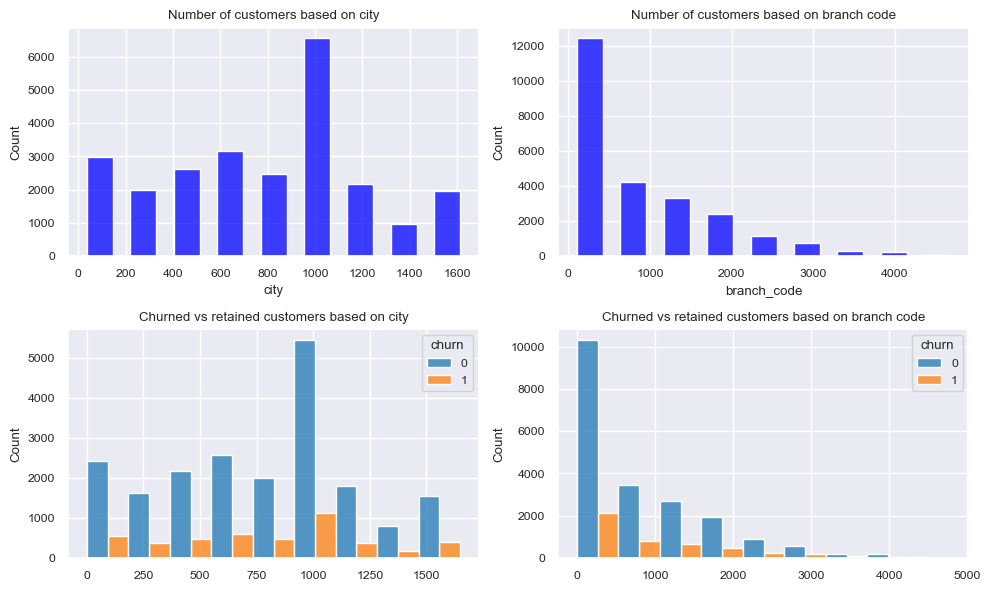

In [25]:
loc_columns = ['city','branch_code']

fig, axes = plt.subplots(2,2, figsize=(10,6))

axes=axes.flatten()

for i, col in enumerate(loc_columns):
    ## Determine the number of customers based on 'city', and 'branch_code'
    sns.histplot(data=df1, x=col, multiple='dodge', color='blue', bins=9, shrink=0.6, ax=axes[i])
    axes[i].set_title('Number of customers based on {}'.format(col).replace('_', ' '))
    ## Plot relationship between 'city', 'branch code', and 'churn'
    sns.histplot(data=df1, x=col, hue='churn', palette=sns.color_palette('tab10', 2), multiple='dodge', bins=9, shrink=1, ax=axes[i+2])
    axes[i+2].set_title('Churned vs retained customers based on {}'.format(col).replace('_', ' '))
    axes[i+2].set_xlabel(xlabel='')

plt.tight_layout()
plt.show()

1. The most number of customer came from the 1000s city. This is where the most number of churned customers were observed.
2. The same as the findings in 'city' vs 'churn', the most of number of customers churned were found in the branches with lowest branch codes, which holds the most number of customers.

#### 4.4 Net Worth, Balance, Debit, and Credit

For this relationship, we will plot the relationship between financial variables such as `customer_nw_category`, `current_balance`, `previous_month_end_balance`, `average_monthly_balance_prevQ`, `average_monthly_balance_prevQ2`, `current_month_credit`, `previous_month_credit`, `current_month_debit`, `previous_month_debit`, `current_month_balance`, and `previous_month_balance` to the decision of the customer to churn.

#### 4.4.1 Customer Net Worth

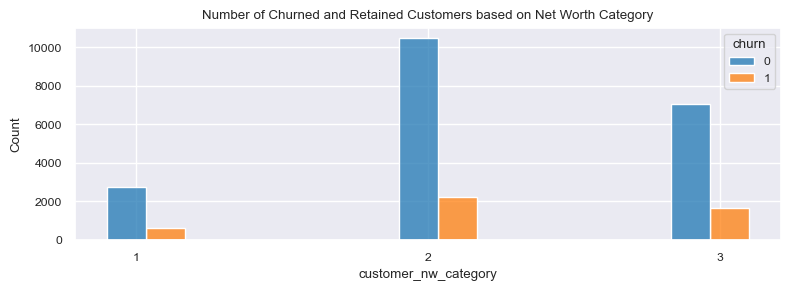

In [30]:
fig = plt.subplots(1,1, figsize=(8,3))

## Plot the relationship between 'customer_nw_category' and 'churn'
sns.histplot(data=df1, x='customer_nw_category', hue='churn', multiple='dodge', shrink=4, palette=sns.color_palette('tab10', 2))
plt.xticks([1,2,3])
plt.title('Number of Churned and Retained Customers based on Net Worth Category')

plt.tight_layout()
plt.show()

1. Customers belonging in the Net Worth Category 2 are the most likely to churn, closely followed by customers belonging to Net Worth Category 3.
2. After removing the outliers, the number of churned customers for Net Worth Categories 2 and 3 became closer.

#### 4.4.2 Current and Previous Month Balance

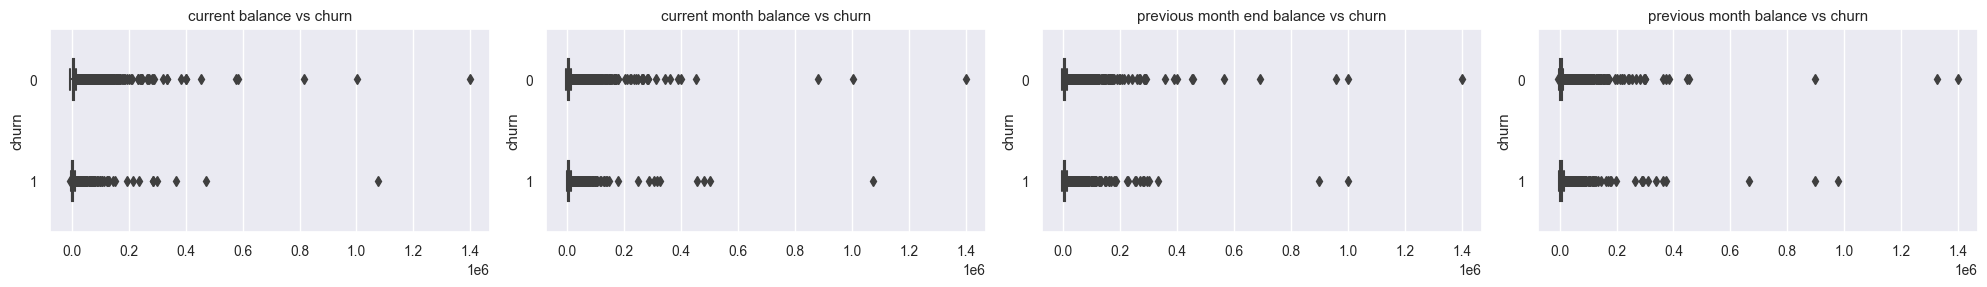

In [32]:
fig, axes = plt.subplots(1,4, figsize=(20,3))
axes=axes.flatten()
sns.set(font_scale=0.9)

curr_prev_month_balance = ['current_balance','current_month_balance','previous_month_end_balance','previous_month_balance']

for i, col in enumerate(curr_prev_month_balance):
    ## Plot the relationship between 'current_balance', 'current_month_balance', 'previous_month_end_balance', and 'previous_month_balance' vs 'churn'
    sns.boxplot(data=df1, x=col, y='churn', orient='h', palette=sns.color_palette('tab10', 2), width=0.4, ax=axes[i])
    axes[i].set_title('{} vs churn'.format(col.replace('_',' ')))
    axes[i].set_xlabel(xlabel='')

plt.tight_layout()
plt.show()

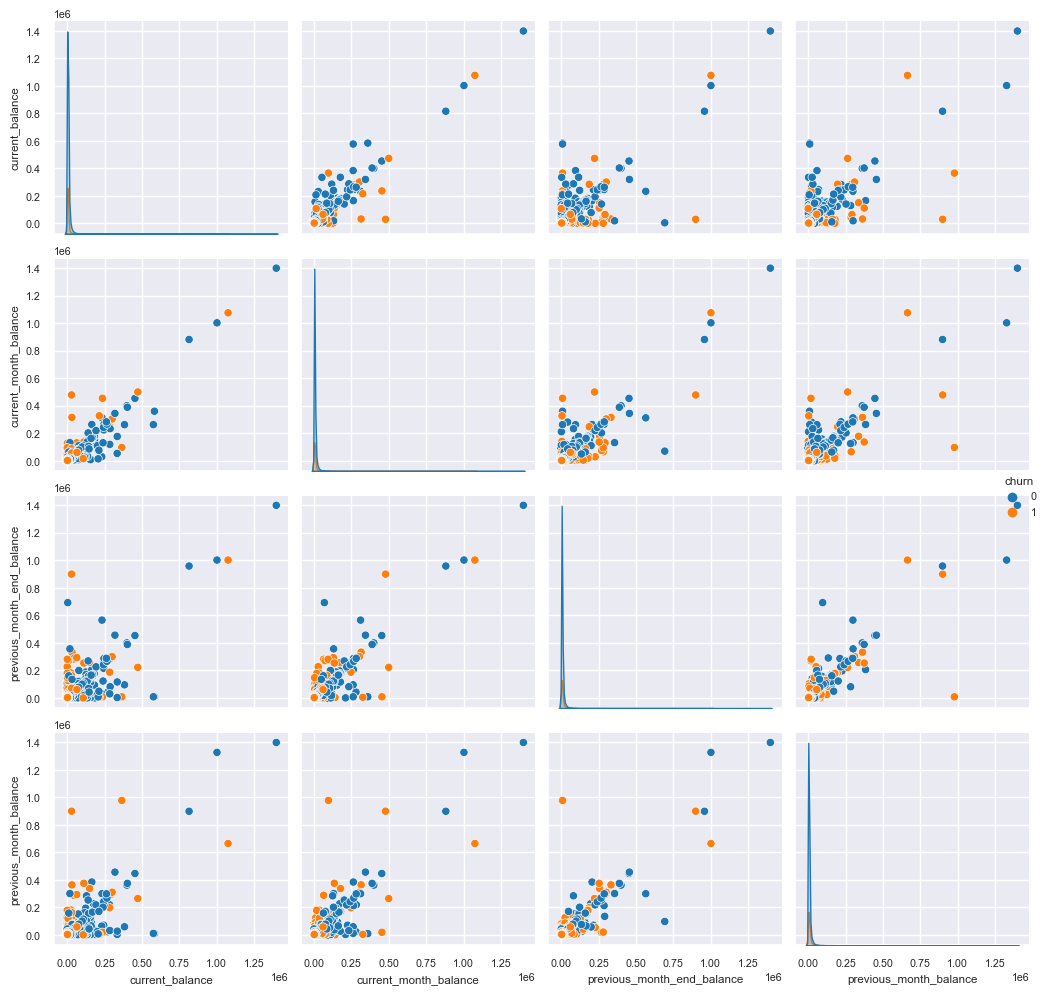

In [96]:
curr_prev_month_bal = df1[['current_balance','current_month_balance','previous_month_end_balance','previous_month_balance','churn']]

sns.set(font_scale=0.7)

## Create a pairplot to visualize the relationship between balance-related variables and churn
sns.pairplot(curr_prev_month_bal, hue='churn', palette=sns.color_palette('tab10', 2))

plt.tight_layout()
plt.show()

1. Customers who churned have lower current balance compared to customers who retained. This relationship is most noticeable in the pairplots.
2. Customers who churned also have lower balance from the previous month and is most noticeable in the pairplots.
3. Customers with high account balance but churned were identified as outliers.

#### 4.4.3 Previous Quarter Balance

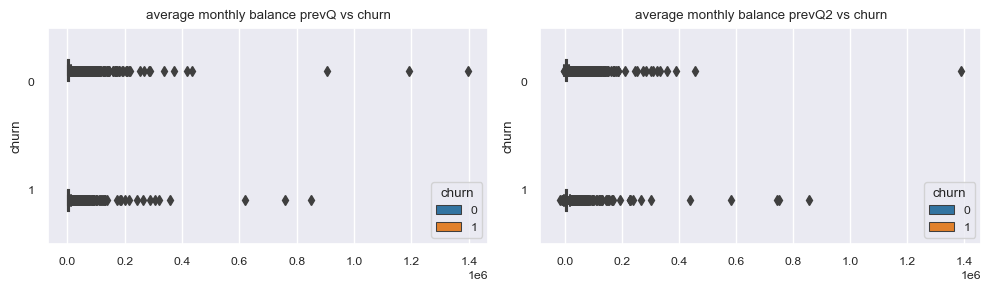

In [87]:
quarter_balance = ['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']

fig, axes = plt.subplots(1,2, figsize=(10,3))

axes=axes.flatten()

for i, col in enumerate(quarter_balance):
    ## Plot the relationship between 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2', and 'churn'
    sns.boxplot(data=df1, x=col, y='churn', hue='churn', orient='h', width=0.4, palette=sns.color_palette('tab10', 2), ax=axes[i])
    axes[i].set_title('{} vs churn'.format(col).replace('_', ' '))
    axes[i].set_xlabel(xlabel='')

plt.tight_layout()
plt.show()

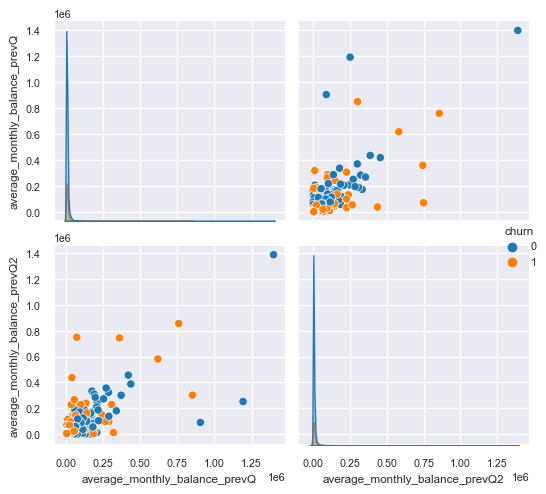

In [95]:
quarter_bal = df1[['average_monthly_balance_prevQ','average_monthly_balance_prevQ2','churn']]

sns.set(font_scale=0.7)

## Create a pairplot to visualize the relationship between quarter balance variables and churn
sns.pairplot(quarter_bal, hue='churn', palette=sns.color_palette('tab10',2))

plt.tight_layout()
plt.show()

1. Similar to the findings from the current and monthly balance relationships, customers with low previous quarter balance tend to churn.
2. Customers who have high previous quarter balance who churned were identified as outliers.

#### 4.4.4 Credit and Debit

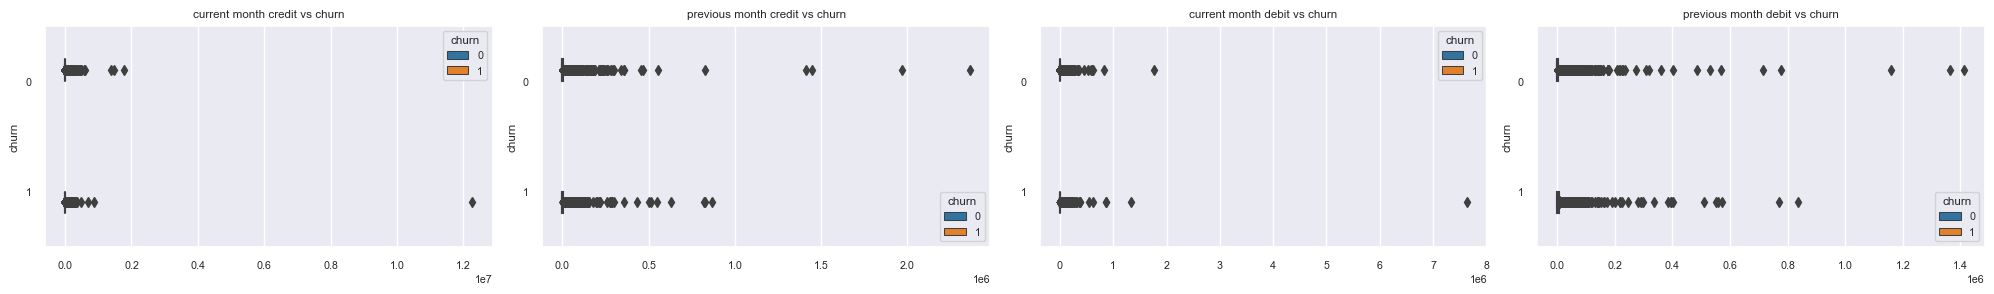

In [97]:
credit_debit = ['current_month_credit','previous_month_credit','current_month_debit','previous_month_debit']

fig, axes = plt.subplots(1,4, figsize=(20,3))

axes=axes.flatten()

for i, col in enumerate(credit_debit):
    ## Plot the relationship between 'current_month_credit', 'previous_month_credit', 'current_month_debit', 'previous_month_debit', and 'churn'
    sns.boxplot(data=df1, x=col, y='churn', hue='churn', width=0.4, orient='h', palette=sns.color_palette('tab10', 2), ax=axes[i])
    axes[i].set_title('{} vs churn'.format(col).replace('_', ' '))
    axes[i].set_xlabel(xlabel='')

plt.tight_layout()
plt.show()

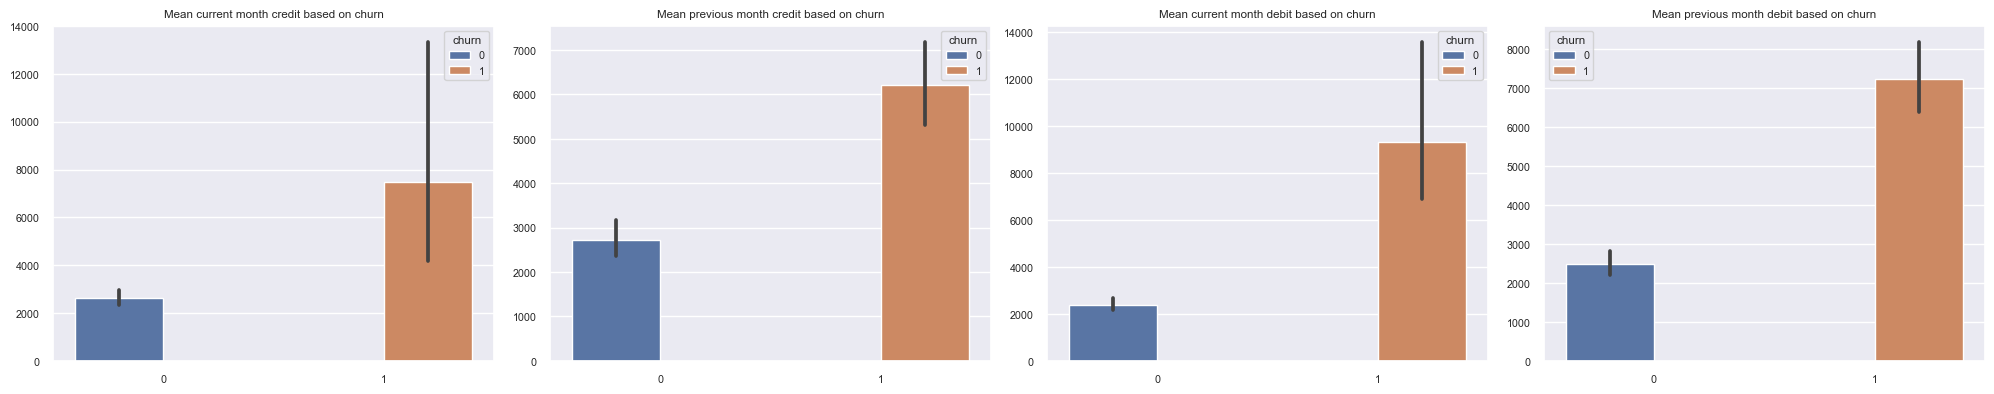

In [100]:
fig, axes = plt.subplots(1,4, figsize=(20,4))

axes=axes.flatten()

for i, col in enumerate(credit_debit):
    ## Plot the relationship between 'current_month_credit','previous_month_credit','current_month_debit','previous_month_debit', and 'churn' using barplot
    sns.barplot(data=df1, x='churn', y=col, estimator='mean', hue='churn', ax=axes[i])
    axes[i].set_title('Mean {} based on churn'.format(col).replace('_',' '))
    axes[i].set_xlabel(xlabel='')
    axes[i].set_ylabel(ylabel='')

plt.tight_layout()
plt.show()

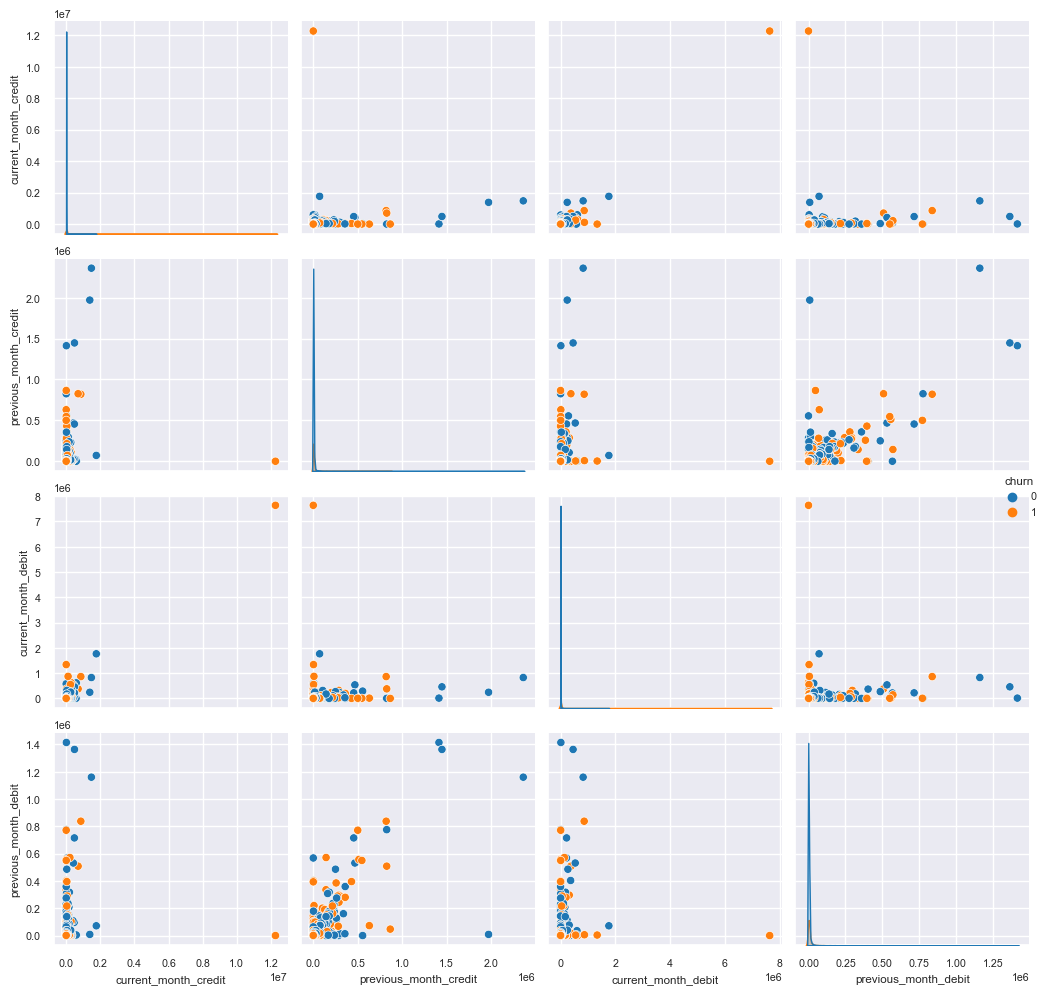

In [101]:
credit_debit_col = df1[['current_month_credit','previous_month_credit','current_month_debit','previous_month_debit','churn']]

## Create a plot to visualize the relationship between credit and debit variables and churn
sns.pairplot(credit_debit_col, hue='churn', palette=sns.color_palette('tab10',2))

plt.tight_layout()
plt.show()

1. Customers who churned have a much higher credit and debit amount compared to customers who retained. However, after removing the outliers, the credit amount for both churned and not churned are almost similar, but still have noticeable difference in terms of debit amount, with customers who churned still have the higher debit amounts.
2. Based on the findings stated in number 1, it seems like customers who churned are active customers, as shown with noticeably higher debit amounts for the current and previous month.
3. It also seems like the customers who churned have much higher credit amounts, which classified as outliers, as shown in the comparison between the two bar charts with similar comparison. Removing the outliers reduced the mean credit amount up to a point that it is almost equal to the mean credit amount for customers who did not churned.